<div style="color:white;
            display:fill;
            border-radius:10px;
            background-color:#006400;
            font-size:140%;
            font-family:Verdana;
            letter-spacing:1px;
            padding: 20px;
            text-align:center;
            font-weight: bold;">
   Customer Churn Prediction
</div>


### **Setting Up the Essentials**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import LabelEncoder

In [2]:
df  = pd.read_csv(r"C:\Users\user\Desktop\churn.csv")

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### **Exploratory Data Analysis**

In [4]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Churn            10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


(10000, 14)

In [5]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Churn              0
dtype: int64

In [6]:
df = df.drop(df.columns[:3], axis=1)

In [7]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [8]:
encoder = LabelEncoder()
df['Gender'] = encoder.fit_transform(df['Gender'])

In [9]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn
0,619,France,0,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0
2,502,France,0,42,8,159660.80,3,1,0,113931.57,1
3,699,France,0,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0


In [10]:
df.groupby('Geography')['Churn'].mean()

Geography
France     0.161548
Germany    0.324432
Spain      0.166734
Name: Churn, dtype: float64

In [11]:
df = pd.get_dummies(df, columns=['Geography'], prefix='Geo')

In [12]:
df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn,Geo_France,Geo_Germany,Geo_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,True,False,False
1,608,0,41,1,83807.86,1,0,1,112542.58,0,False,False,True
2,502,0,42,8,159660.80,3,1,0,113931.57,1,True,False,False
3,699,0,39,1,0.00,2,0,0,93826.63,0,True,False,False
4,850,0,43,2,125510.82,1,1,1,79084.10,0,False,False,True


In [13]:
df['France'] = encoder.fit_transform(df['Geo_France'])
df['Germany'] = encoder.fit_transform(df['Geo_Germany'])
df['Spain'] = encoder.fit_transform(df['Geo_Spain'])

In [14]:
df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn,Geo_France,Geo_Germany,Geo_Spain,France,Germany,Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,True,False,False,1,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,False,False,True,0,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,1,True,False,False,1,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,True,False,False,1,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,False,False,True,0,0,1


In [15]:
df = df.drop(columns=['Geo_Germany', 'Geo_Spain'])

<Axes: >

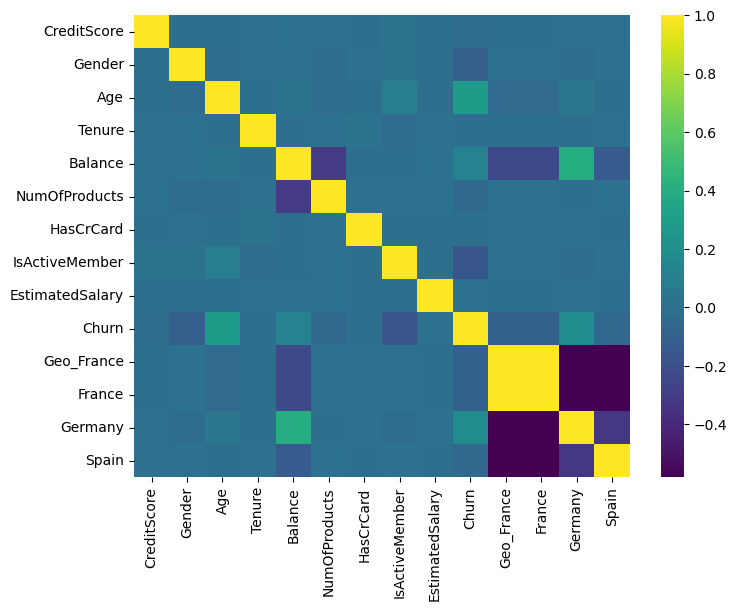

In [16]:
correlation_df = df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_df, annot=False,cmap='viridis')

<Axes: xlabel='Age', ylabel='Count'>

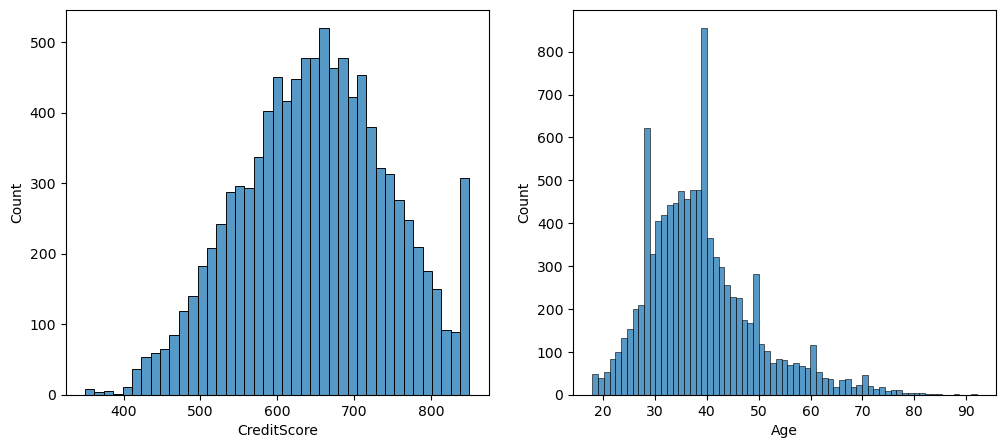

In [17]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.histplot(df['CreditScore'], ax=axes[0])
sns.histplot(df['Age'],ax=axes[1])

### **Model Benchmarking**

#### Logistic Regression

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

In [19]:
X = df.drop('Churn', axis=1)
y = df['Churn']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [21]:
model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [22]:
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[2354   54]
 [ 558   34]]

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.98      0.88      2408
           1       0.39      0.06      0.10       592

    accuracy                           0.80      3000
   macro avg       0.60      0.52      0.49      3000
weighted avg       0.73      0.80      0.73      3000



#### Random Forest

In [23]:
from sklearn.ensemble import RandomForestClassifier

In [24]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [25]:
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[2319   89]
 [ 325  267]]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.96      0.92      2408
           1       0.75      0.45      0.56       592

    accuracy                           0.86      3000
   macro avg       0.81      0.71      0.74      3000
weighted avg       0.85      0.86      0.85      3000



#### Support Vector Machine

In [26]:
from sklearn.svm import SVC

In [27]:
model = SVC()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [28]:
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, zero_division=1))

Confusion Matrix:
 [[2408    0]
 [ 592    0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.80      1.00      0.89      2408
           1       1.00      0.00      0.00       592

    accuracy                           0.80      3000
   macro avg       0.90      0.50      0.45      3000
weighted avg       0.84      0.80      0.71      3000



#### XGBoost

In [29]:
from xgboost import XGBClassifier

In [30]:
model = XGBClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [31]:
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[2255  153]
 [ 308  284]]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.94      0.91      2408
           1       0.65      0.48      0.55       592

    accuracy                           0.85      3000
   macro avg       0.76      0.71      0.73      3000
weighted avg       0.83      0.85      0.84      3000



#### LightGBM

In [32]:
from lightgbm import LGBMClassifier

In [33]:
model = LGBMClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

[LightGBM] [Info] Number of positive: 1445, number of negative: 5555
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000228 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 860
[LightGBM] [Info] Number of data points in the train set: 7000, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.206429 -> initscore=-1.346589
[LightGBM] [Info] Start training from score -1.346589


In [34]:
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[2279  129]
 [ 303  289]]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.95      0.91      2408
           1       0.69      0.49      0.57       592

    accuracy                           0.86      3000
   macro avg       0.79      0.72      0.74      3000
weighted avg       0.84      0.86      0.85      3000



#### CatBoost

In [35]:
from catboost import CatBoostClassifier

In [36]:
model = CatBoostClassifier(silent=True)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [37]:
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[2310   98]
 [ 307  285]]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.96      0.92      2408
           1       0.74      0.48      0.58       592

    accuracy                           0.86      3000
   macro avg       0.81      0.72      0.75      3000
weighted avg       0.86      0.86      0.85      3000



#### And we are choosing Randome Forest, because its hyperparameter tunning is way faster :)

### **Hyperparameter Tunning for Random Forest**

In [38]:
from sklearn.model_selection import GridSearchCV

In [40]:
model = RandomForestClassifier()

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, 
                           cv=5, scoring='accuracy', n_jobs=-1, verbose=2)

grid_search.fit(X_train, y_train)

print("Best parameters found: ", grid_search.best_params_)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


C:\Users\user\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Best parameters found:  {'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}


In [42]:
best_params = {
    'max_depth': None,
    'max_features': 'auto',
    'min_samples_leaf': 4,
    'min_samples_split': 10,
    'n_estimators': 200
}

tunned_model = RandomForestClassifier(**best_params)

tunned_model.fit(X_train, y_train)

y_pred = tunned_model.predict(X_test)

C:\Users\user\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


In [43]:
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[2328   80]
 [ 335  257]]

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.97      0.92      2408
           1       0.76      0.43      0.55       592

    accuracy                           0.86      3000
   macro avg       0.82      0.70      0.74      3000
weighted avg       0.85      0.86      0.85      3000



### And here we have our model, which predicts Customer Churn with quite impressive results 